In [1]:
"""
    Simple SV lookups and assembly coverage reporting with BioGraph
"""
import libspiral
from biograph import *

In [2]:
# Import a reference
ref37 = reference("/reference/human_g1k_v37")

In [3]:
# Load 125 individuals
bg = new_graph("/mnt/cohort_125.gbwt")

# Choose between individuals in a merged BioGraph using readsets
na12877 = bg.load_readset("/mnt/NA12877_S1.bitmap") 
na12878 = bg.load_readset("/mnt/NA12878_S1.bitmap") 
na12879 = bg.load_readset("/mnt/NA12879_S1.bitmap") 
na12880 = bg.load_readset("/mnt/NA12880_S1.bitmap") 

In [4]:
# Pick a region of interest
chromosome = "2"
start = 100000
end = 200000

In [5]:
# Find variants in the region of interest
vars = find_variants(bg, ref37, chromosome, start, end, readset=na12878)

In [6]:
# Show the assembly for an arbitrary variant
v = vars[0].variants[11]
v.assembly_sequence

libspiral.sequence('TAATTAATGATTCCCCATCACCATTTTCAGAAAACCCAGTAACTTAGTGCCTTAAGATGTTCAAATCATCCCAAAAACTTGAGTTACTAAATATTTTCAAAACCCTTTCTCAAGCTTTGCTATTCTAGCTTTAGTTGGAAGAAGAAGCTTCCAAGTTAAAGATGGTAGACGAAATACTGACCCAGTTGTGTCCTTTCCCTCCTGAGAAACCATGGTGGCTATCCACGATGGAGAGAGAGCAGCGGAGACAAAAAGTGATTTGATGGCCTCGCATCCGTGAGAAGGAGCATCATCTGTGGACCTTCCTGGGGGTGAGGGGCAGAGAAGTGAGGCAGGCATCAGAAAACAGGAGGGTCGATTAAAATCTGTACATTGACAGTCAACCCTCATTATCCTCCCTCACCGATGCC')

In [7]:
# v.range represents the range of the reference covered by this variant.
print v.range

# v.range.sequence is the nucleotide sequence of the reference at this position.
print v.range.sequence

# v.sequence is the nucleotide sequence of the variant at the same position.
print v.sequence

2:[173170-173171)
T
G


In [8]:
# Compute coverage for the assembly in each individual
coverage77 = bg.seq_coverage(v.assembly_sequence, na12877)
coverage78 = bg.seq_coverage(v.assembly_sequence, na12878)
coverage79 = bg.seq_coverage(v.assembly_sequence, na12879)
coverage80 = bg.seq_coverage(v.assembly_sequence, na12880)

In [9]:
# Coverage is a list of numbers representing the depth of coverage
# for each base in the sequence
bg.seq_coverage(v.assembly_sequence, na12879)[10:30]

[7, 8, 8, 9, 10, 10, 11, 12, 12, 13, 13, 14, 15, 16, 16, 16, 17, 18, 18, 19]

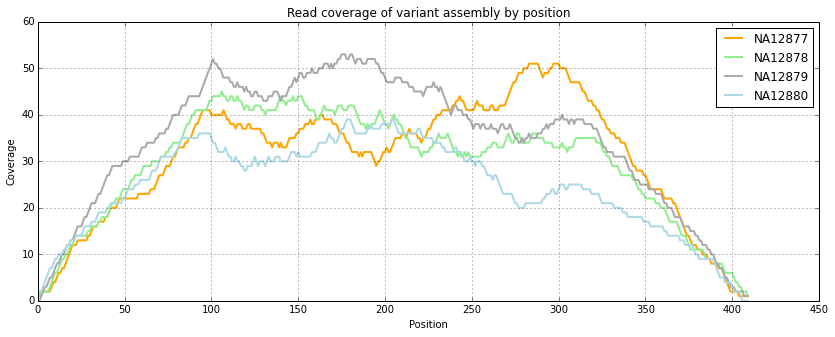

In [10]:
# Let's plot the coverage for each individual

%matplotlib inline
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.figure()

fig, ax = plt.subplots(figsize=(14,5))

line1 = plt.plot(coverage77, color='orange', linewidth=2)
line2 = plt.plot(coverage78, color='lightgreen', linewidth=2)
line3 = plt.plot(coverage79, color='darkgray', linewidth=2)
line4 = plt.plot(coverage80, color='lightblue', linewidth=2)

plt.xlabel('Position')
plt.ylabel('Coverage')
plt.title('Read coverage of variant assembly by position'
)
plt.grid(True)

ax.legend((line1[0], line2[0], line3[0], line4[0]), 
          ('NA12877', 'NA12878', 'NA12879', 'NA12880'))

plt.show()